In [2]:
#Importing my Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
#Loading the dataset
df = pd.read_csv('heart.csv')

## Understanding the Dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

OBSERVATION

The Dataset has 303 rows and 14 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


OBSERVATION

We can see that each column has an equal number of 303 rows with no null value present in each of the columns. Also all the values in the Dataset are integers except for the values in the 9th column with are floats

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We can see that the maximum patient age is 77 while the minimum is 29

## Exploratory Data Analysis

In [8]:
# Setting the style for my plots
sns.set_style("whitegrid")

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'Amount')

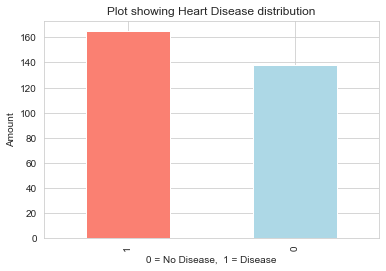

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Plot showing Heart Disease distribution")
plt.xlabel("0 = No Disease,  1 = Disease")
plt.ylabel("Amount")

OBSERVATION

We can see that the amoount of people that have heart diseases are more than those that don't

Text(0, 0.5, 'Amount')

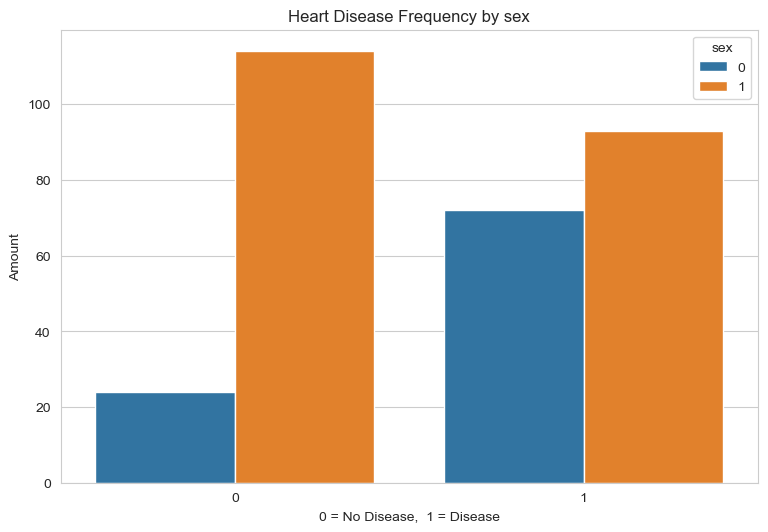

In [14]:
plt.figure(figsize=(9,6),dpi=100)
sns.countplot(x=df['target'], hue=df['sex'], data=df)
plt.title("Heart Disease Frequency by sex")
plt.xlabel("0 = No Disease,  1 = Disease")
plt.ylabel("Amount")

OBSERVATION

From the Data discription for the sex column, Blue = female and Brown = male. The number of male that do not have heart disease is higher than those that have while the reverse is the case for the females, they have a higher number having the disease than those that don't 

In [40]:
#creating a new column for agerange
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)


In [16]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agerange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39


In [17]:
df.agerange.unique()

['60-69', '30-39', '40-49', '50-59', '70+', '18-29']
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

Text(0, 0.5, 'Amount')

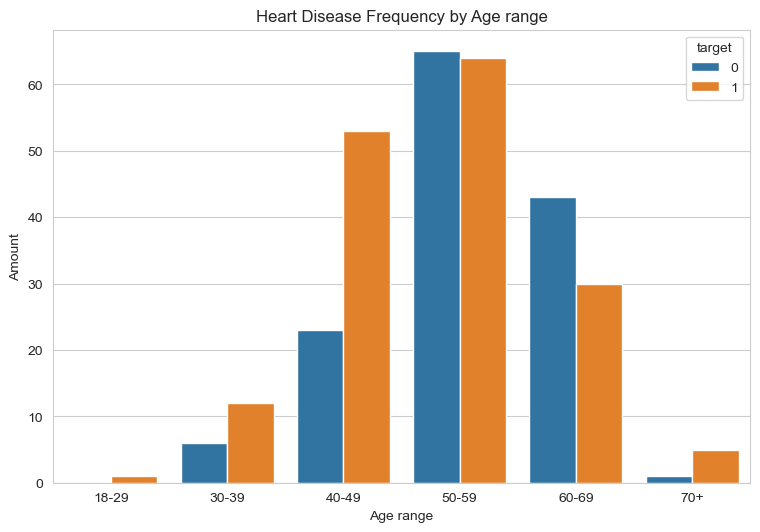

In [18]:
plt.figure(figsize=(9,6),dpi=100)
sns.countplot(x=df['agerange'], hue=df['target'], data=df)
plt.title("Heart Disease Frequency by Age range")
plt.xlabel("Age range")
plt.ylabel("Amount")

OBSERVATION

0 = Without the disease , 1 = With the disease. 
Majority of the patients for this study are within the ages of 40-70. We can see the heart disease distribution within each age bracket

Text(0.5, 1.0, 'Heart Rate Distribution by Age')

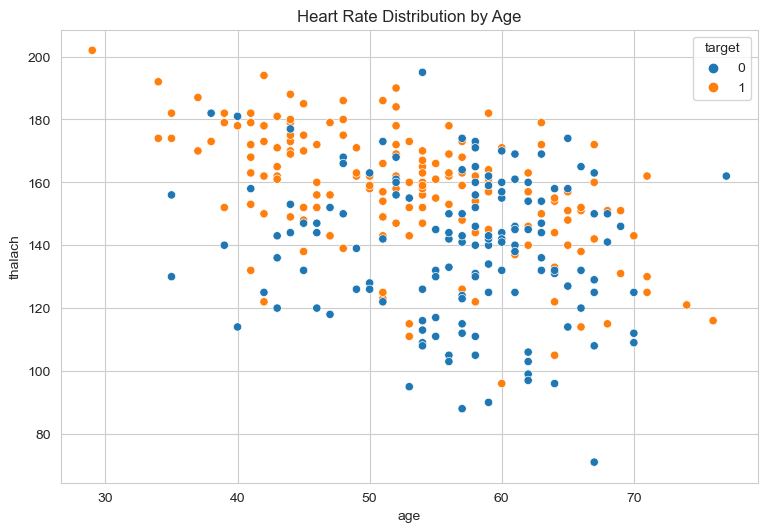

In [19]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(x=df.age,y=df.thalach, hue=df.target);
plt.title("Heart Rate Distribution by Age")


OBSERVATION


The Thalach value is the maximum heart rate achieved. It is seen that patients with high thalach value are likely to have heart disease

Text(0, 0.5, 'Amount')

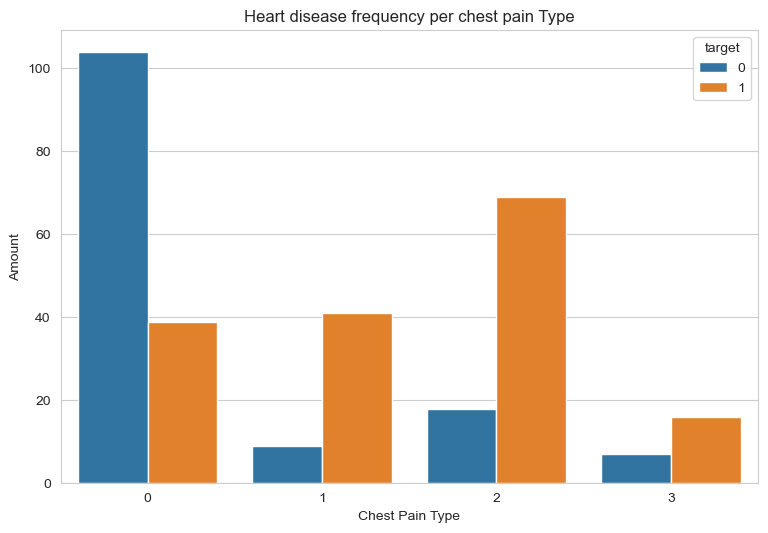

In [20]:
plt.figure(figsize=(9,6),dpi=100)
sns.countplot(x=df['cp'], hue=df['target'], data=df)
plt.title("Heart disease frequency per chest pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")

OBSERVATION

Most of the patients with the cp of 0 do not have heart disease but the reverse is the case for the other 3 chest pain levels. They have more people having the disease than those that don't

## Machine Learning

#### Importing the tools

In [21]:
# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agerange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59


In [23]:
data_copy = df.copy()

In [24]:
#making a copy of the dataframe
data_copy.to_csv('data_copy.csv')

In [25]:
#droping the agerange column and assignning it to df2
df2 = df.drop('agerange', 1)

In [26]:
df2.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [27]:
# Splittng the data into X and y
X= df2.drop("target",axis=1)
y = df2["target"]

#### Importing the models and tools

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import TweedieRegressor

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [30]:
#spiting the data into training and testing sets with a ratio of 80:20
np.random.seed(8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (242, 13), 
y_train shape: (242,),
X_test shape: (61, 13),
y_test shape: (61,)



In [32]:
# Scaling the data using Standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train

array([[ 0.39558672,  0.68313005, -0.97227182, ...,  0.9883717 ,
        -0.7165815 ,  1.10769755],
       [ 0.28229443,  0.68313005,  0.97227182, ...,  0.9883717 ,
         0.27434834,  1.10769755],
       [-0.05758245,  0.68313005,  0.97227182, ...,  0.9883717 ,
        -0.7165815 ,  1.10769755],
       ...,
       [ 0.39558672,  0.68313005, -0.97227182, ..., -0.68425733,
         2.25620803,  1.10769755],
       [ 0.62217131, -1.46385011,  0.97227182, ...,  0.9883717 ,
        -0.7165815 , -0.567695  ],
       [-1.53038224,  0.68313005,  0.        , ...,  0.9883717 ,
        -0.7165815 , -0.567695  ]])

#### Building the Model

We are using 4 different models 
- Logistic Regression
- KNeighborsClassifier
- RandomForestClassifier
- TweedieRegressor

In [34]:
# Put Modeles in a Dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Tweedie": TweedieRegressor()}

In [35]:
# Create a Function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Set Random seed
    np.random.seed(42)
    
    # Create a disctionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [36]:
model_scores = fit_and_score(models=models, 
                             X_train= X_train, 
                             X_test=X_test,
                            y_train= y_train,
                            y_test=y_test)

model_scores


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.8688524590163934,
 'Random Forest': 0.7868852459016393,
 'Tweedie': 0.4034306742830893}

In [37]:
#Baseline Model Comparism
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

print(model_compare)

          Logistic Regression       KNN  Random Forest   Tweedie
accuracy             0.852459  0.868852       0.786885  0.403431


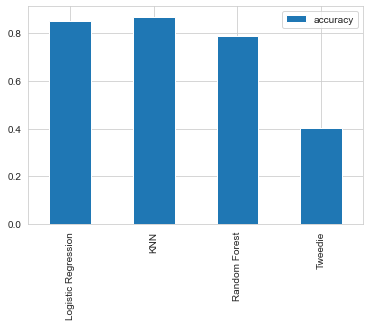

In [38]:
model_compare.T.plot.bar();

OBSERVATION

The Accuracy for each of the models are
- Logistic Regression :        85%
- KNeighborsClassifier :       87%
- RandomForestClassifier :     79%
- TweedieRegressor :           40%

The tweedie Regressor did the lowest ans as such, would not be a better option for the prediction 

.

#### Hyperparameter tuning of the Logistic Regression Model using GridSearch CV

In [39]:
# Different hyperparameters for our LogisticsRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}


# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit grid Hyperparameters  sear model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.01610262027560939, 'solver': 'liblinear'}

In [42]:
# Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

OBSERVATION

Upon using the Gridsearch CV, The accuracy of the model has improved from 85% to 88%

In [44]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [46]:
y_test

141    1
222    0
135    1
139    1
175    0
      ..
96     1
151    1
262    0
110    1
100    1
Name: target, Length: 61, dtype: int64

We can see that the predicted outcome is similar to that of the y_test.

#### ROC CURVE

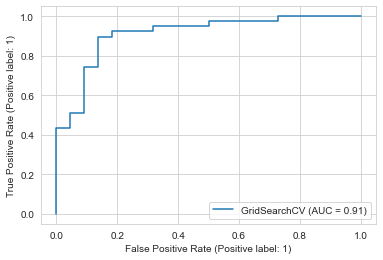

In [47]:
plot_roc_curve(gs_log_reg, X_test, y_test);

OBSERVATIONS

A plot of the true positive rate against the false positive shows that the model is performing optimally.

#### Confusion Matrix

In [48]:
print(confusion_matrix(y_test, y_preds))

[[19  3]
 [ 4 35]]


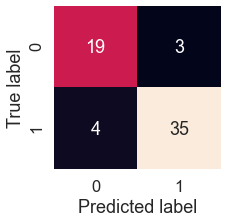

In [49]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

#### Classification Report

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.92      0.90      0.91        39

    accuracy                           0.89        61
   macro avg       0.87      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Feature Importance

In [51]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [52]:
# Check coeficients (coef)
clf.coef_

array([[-0.0353667 , -0.58111493,  0.68067952, -0.22900346, -0.20660445,
         0.18137104,  0.19017636,  0.57095015, -0.37178831, -0.38571469,
         0.30535327, -0.73213617, -0.52134414]])

In [53]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.03536669580248791,
 'sex': -0.5811149330049087,
 'cp': 0.6806795156139229,
 'trestbps': -0.22900345696523577,
 'chol': -0.20660445170171365,
 'fbs': 0.1813710417066865,
 'restecg': 0.19017636179428252,
 'thalach': 0.570950149248331,
 'exang': -0.3717883129064287,
 'oldpeak': -0.38571469158552885,
 'slope': 0.3053532746197859,
 'ca': -0.7321361723987511,
 'thal': -0.5213441436072305}

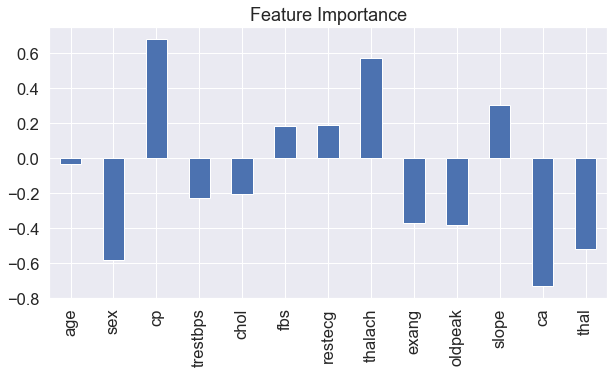

In [54]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])


feature_df.T.plot.bar(title="Feature Importance",figsize=(10,5),legend=False);

OBSERVATION 

From the above we can clearly see the features contributing to the prediction of the model